---

# Topic Modeling (Prepare)

On Monday we talked about summarizing your documents using just token counts. Today, we're going to learn about a much more sophisticated approach - learning 'topics' from documents. Topics are a latent structure. They are not directly observable in the data, but we know they're there by reading them.

> **latent**: existing but not yet developed or manifest; hidden or concealed.

## Use Cases
Primary use case: what the hell are your documents about? Who might want to know that in industry - 
* Identifying common themes in customer reviews
* Discovering the needle in a haystack 
* Monitoring communications (Email - State Department) 

## Learning Objectives
*At the end of the lesson you should be able to:*
* Part 0: Warm-Up
* Part 1: Describe how an LDA Model works
* Part 2: Estimate a LDA Model with Gensim
* Part 3: Interpret LDA results & Select the appropriate number of topics

# Part 0: Warm-Up
How do we do a grid search? 

In [36]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# Dataset
# categories = ['sci.electronics',
#               'rec.sport.baseball',
#               'rec.sport.hockey']

# Load training data
newsgroups_train = fetch_20newsgroups(subset='train', 
                                      remove=('headers', 'footers', 'quotes'))

# Load testing data
newsgroups_test = fetch_20newsgroups(subset='test', 
                                     remove=('headers', 'footers', 'quotes'))

print(f'Training Samples: {len(newsgroups_train.data)}')
print(f'Testing Samples: {len(newsgroups_test.data)}')

Training Samples: 11314
Testing Samples: 7532


In [4]:
newsgroups_train['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
newsgroups_train['data'][0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

### GridSearch on Just Classifier
* Fit the vectorizer and prepare BEFORE it goes into the gridsearch

In [6]:
# create tfidf instant

# transform data

# create parameter dict

# create model instance 

# instantiate a grid search object

# optimize model parameters
vect1 = TfidfVectorizer()
X_train = vect1.fit_transform(newsgroups_train['data'])
print(X_train.shape)

(11314, 101631)


In [8]:
dir(newsgroups_train)

['DESCR', 'data', 'filenames', 'target', 'target_names']

In [9]:
y = newsgroups_train['target']
y.shape

(11314,)

In [10]:
p1 = {
    'n_estimators': [10, 50],
    'max_depth': [None, 10]
}

clf = RandomForestClassifier()
gs1 = GridSearchCV(clf, p1, cv=5, n_jobs=-1, verbose=1)
gs1.fit(X_train, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [11]:
gs1.best_params_

{'max_depth': None, 'n_estimators': 50}

In [12]:
gs1.best_score_

0.6088037951859244

In [15]:
# create and tranform a sample text 
sample_vec = vect1.transform(['The yankees are the best team in baseball'])
print(sample_vec.shape)

# use the model to classify the sample text 
gs1.predict(sample_vec)

(1, 101631)


array([9])

In [17]:
newsgroups_train['target_names'][9]

'rec.sport.baseball'

### GridSearch with BOTH the Vectoizer & Classifier

In [19]:
from sklearn.pipeline import Pipeline

# create tfidf instance

# create model instance 

# Create a pipline instance using tfidf and your model 

# create parameter dict

# instantiate a grid search object

# optimize model parameters

pipeline = Pipeline([
    ('vect', vect1),
    ('clf', clf)
])

p2 = {
    'vect__stop_words': (None, 'english'),
    'vect__min_df': (2, 5),
    'clf__max_depth': (20, None)
}

gs2 = GridSearchCV(pipeline, p2, cv=5, n_jobs=-1, verbose=1)
gs2.fit(newsgroups_train['data'], newsgroups_train['target'])

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        no

In [20]:
gs2.best_params_

{'clf__max_depth': None, 'vect__min_df': 2, 'vect__stop_words': 'english'}

In [22]:
gs2.best_score_

0.6630721486192558

In [23]:
# pass a raw text sample into the optimized model in order to classify it
gs2.predict(['The yankees are the best team in baseball'])

array([9])

Advantages to using GS with the Pipe:
* Allows us to make predictions on raw text increasing reproducibility. :)
* Allows us to tune the parameters of the vectorizer along side the classifier. :D 

# Part 1: Describe how an LDA Model works

[Your Guide to Latent Dirichlet Allocation](https://medium.com/@lettier/how-does-lda-work-ill-explain-using-emoji-108abf40fa7d)

[LDA Topic Modeling](https://lettier.com/projects/lda-topic-modeling/)

[Topic Modeling with Gensim](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/)

In [24]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy

import pyLDAvis
import pyLDAvis.gensim 
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
df = pd.DataFrame({
    'content': newsgroups_train['data'],
    'target': newsgroups_train['target'],
    'target_names': [newsgroups_train['target_names'][i] for i in newsgroups_train['target']]
})
print(df.shape)
df.head()

(11314, 3)


C:\Users\Owner\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,content,target,target_names
0,I was wondering if anyone out there could enli...,7,rec.autos
1,A fair number of brave souls who upgraded thei...,4,comp.sys.mac.hardware
2,"well folks, my mac plus finally gave up the gh...",4,comp.sys.mac.hardware
3,\nDo you have Weitek's address/phone number? ...,1,comp.graphics
4,"From article <C5owCB.n3p@world.std.com>, by to...",14,sci.space


In [26]:
pd.set_option('display.max_colwidth', 300)

df.sample(5)

C:\Users\Owner\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,content,target,target_names
1060,"\n\nAs far as I know, they did; my new Mac came with one yesterday...\n(And I got my ergonomic keyboard, on order for three months, the\nother day, too!)\n\nCheers,\n\n\t\t\t\t\t/ h+\n-- \n -- Jon W{tte, h+@nada.kth.se, Mac Hacker Deluxe --",4,comp.sys.mac.hardware
10359,"\nAh, not in the USA. Thats a relief, thought 'reality' must be slipping for a\nsecond. :-)\n\nSt Noam was on the radio tonight, he has just published a new book ""501 years"".\nPublished by South End i guess. Could some bostonian confirm please?\n\nI would love to hear what he thinks of the Clipp...",11,sci.crypt
6368,"\n ^^\n \n\n\nFunny you should mention it...this is exactly the case I was going to make.\n\n\nI will grant that a star like Mario will draw fans, even if the team sucks. \nBut this is short term only; I still do not think the attendance increase \nwill last, unless...",10,rec.sport.hockey
2368,\n,7,rec.autos
2235,\nMaybe...then again did you get rid of that H/D of yorn and buy a rice rocket \nof your own? That would certainly explain the friendliness...unless you \nmaybe had a piece of toilet paper stuck on the bottom of your boot...8-).\n\nRich\n,8,rec.motorcycles


In [27]:
# can visit (https://regex101.com/) for a regex python editor (has cheat sheets)

# 1. Remove new line characters
df['clean_text'] = df['content'].apply(lambda x: re.sub('\s+', ' ', x))

# 2. Remove Emails
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub('From: \S+@\S+', '', x))

# 3. Remove non-alphanumeric characters
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))

# 4. Remove extra whitespace and lowercase text
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join(x.lower().split()))

C:\Users\Owner\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:4: DeprecationWarning: invalid escape sequence \s
<>:7: DeprecationWarning: invalid escape sequence \S
<>:4: DeprecationWarning: invalid escape sequence \s
<>:7: DeprecationWarning: invalid escape sequence \S
<ipython-input-27-0c70f6a85105>:4: DeprecationWarning: invalid escape sequence \s
  df['clean_text'] = df['content'].apply(lambda x: re.sub('\s+', ' ', x))
<ipython-input-27-0c70f6a85105>:7: DeprecationWarning: invalid escape sequence \S
  df['clean_text'] = df['clean_text'].apply(lambda x: re.sub('From: \S+@\S+', '', x))


In [28]:
df.head()

C:\Users\Owner\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,content,target,target_names,clean_text
0,"I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \...",7,rec.autos,i was wondering if anyone out there could enlighten me on this car i saw the other day it was a door sports car looked to be from the late s early s it was called a bricklin the doors were really small in addition the front bumper was separate from the rest of the body this is all i know if anyo...
1,"A fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy...",4,comp.sys.mac.hardware,a fair number of brave souls who upgraded their si clock oscillator have shared their experiences for this poll please send a brief message detailing your experiences with the procedure top speed attained cpu rated speed add on cards and adapters heat sinks hour of usage per day floppy disk func...
2,"well folks, my mac plus finally gave up the ghost this weekend after\nstarting life as a 512k way back in 1985. sooo, i'm in the market for a\nnew machine a bit sooner than i intended to be...\n\ni'm looking into picking up a powerbook 160 or maybe 180 and have a bunch\nof questions that (hopef...",4,comp.sys.mac.hardware,well folks my mac plus finally gave up the ghost this weekend after starting life as a k way back in sooo i m in the market for a new machine a bit sooner than i intended to be i m looking into picking up a powerbook or maybe and have a bunch of questions that hopefully somebody can answer does ...
3,\nDo you have Weitek's address/phone number? I'd like to get some information\nabout this chip.\n,1,comp.graphics,do you have weitek s address phone number i d like to get some information about this chip
4,"From article <C5owCB.n3p@world.std.com>, by tombaker@world.std.com (Tom A Baker):\n\n\nMy understanding is that the 'expected errors' are basically\nknown bugs in the warning system software - things are checked\nthat don't have the right values in yet because they aren't\nset till after launch,...",14,sci.space,from article c owcb n p world std com by tombaker world std com tom a baker my understanding is that the expected errors are basically known bugs in the warning system software things are checked that don t have the right values in yet because they aren t set till after launch and suchlike rathe...


In [38]:
# Leverage tqdm for progress_apply
from tqdm import tqdm
tqdm.pandas()

# If you're on macOS, Linux, or python session executed from Windows Subsystem for Linux (WSL)
# conda activate U4-S1-NLP
# pip install pandarallel
#
# from pandarallel import pandarallel
# pandarallel.initialize(progress_bar=True)
#
# df['lemmas'] = df['content'].parallel_apply(get_lemmas)
#
# Ref: https://github.com/nalepae/pandarallel

In [39]:
nlp = spacy.load("en_core_web_md", disable=['parser', 'tagger', 'ner'])

In [40]:
# create our tokens in the form of lemmas 
df['lemmas'] = df['clean_text'].progress_apply(lambda x: [token.lemma_ for token in nlp(x) if (token.is_stop != True) and (token.is_punct != True) and (len(token) > 2)])

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11314/11314 [00:09<00:00, 1174.02it/s]


In [41]:
df.head()

,content,target,target_names,clean_text,lemmas
0,"I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \...",7,rec.autos,i was wondering if anyone out there could enlighten me on this car i saw the other day it was a door sports car looked to be from the late s early s it was called a bricklin the doors were really small in addition the front bumper was separate from the rest of the body this is all i know if anyo...,"[wonder, enlighten, car, see, day, door, sport, car, look, late, early, call, bricklin, door, small, addition, bumper, separate, rest, body, know, tellme, model, engine, spec, year, production, car, history, info, funky, look, car, mail]"
1,"A fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy...",4,comp.sys.mac.hardware,a fair number of brave souls who upgraded their si clock oscillator have shared their experiences for this poll please send a brief message detailing your experiences with the procedure top speed attained cpu rated speed add on cards and adapters heat sinks hour of usage per day floppy disk func...,"[fair, numb, brave, soul, upgrade, clock, oscillator, share, experience, poll, send, brief, message, detail, experience, procedure, speed, attain, cpu, rate, speed, add, card, adapter, heat, sink, hour, usage, day, floppy, disk, functionality, floppy, especially, request, summarize, day, add, ne..."
2,"well folks, my mac plus finally gave up the ghost this weekend after\nstarting life as a 512k way back in 1985. sooo, i'm in the market for a\nnew machine a bit sooner than i intended to be...\n\ni'm looking into picking up a powerbook 160 or maybe 180 and have a bunch\nof questions that (hopef...",4,comp.sys.mac.hardware,well folks my mac plus finally gave up the ghost this weekend after starting life as a k way back in sooo i m in the market for a new machine a bit sooner than i intended to be i m looking into picking up a powerbook or maybe and have a bunch of questions that hopefully somebody can answer does ...,"[folk, mac, plus, finally, give, ghost, weekend, start, life, way, sooo, market, new, machine, bite, soon, intend, look, pick, powerbook, maybe, bunch, question, hopefully, somebody, answer, anybody, know, dirt, round, powerbook, introduction, expect, hear, suppose, appearence, summer, haven, he..."
3,\nDo you have Weitek's address/phone number? I'd like to get some information\nabout this chip.\n,1,comp.graphics,do you have weitek s address phone number i d like to get some information about this chip,"[weitek, address, phone, numb, like, information, chip]"
4,"From article <C5owCB.n3p@world.std.com>, by tombaker@world.std.com (Tom A Baker):\n\n\nMy understanding is that the 'expected errors' are basically\nknown bugs in the warning system software - things are checked\nthat don't have the right values in yet because they aren't\nset till after launch,...",14,sci.space,from article c owcb n p world std com by tombaker world std com tom a baker my understanding is that the expected errors are basically known bugs in the warning system software things are checked that don t have the right values in yet because they aren t set till after launch and suchlike rathe...,"[article, owcb, world, std, com, tombaker, world, std, com, tom, baker, understand, expect, error, basically, know, bug, warn, system, software, thing, check, don, right, value, aren, set, till, launch, suchlike, fix, code, possibly, introduce, new, bug, tell, crow, warn, liftoff, ignore]"


### The two main inputs to the LDA topic model are the dictionary (id2word) and the corpus.

In [42]:
# Create Dictionary

# Term Document Frequency

# stores (token id, token count) for each doc in the corpus

# Human readable format of corpus (term-frequency)

id2word = corpora.Dictionary(df['lemmas'])
corpus = [id2word.doc2bow(text) for text in df['lemmas']]

In [43]:
# How many words are in our vocab?
len(id2word.keys())

61160

In [44]:
# Let's remove extreme values
id2word.filter_extremes(no_below=3, no_above=0.2)

In [45]:
# How many words are in our vocab?
len(id2word.keys())

18027

In [46]:
# Re-create DTM with new dictionary of vocab
corpus = [id2word.doc2bow(text) for text in df['lemmas']]

In [51]:
id2word[200]

'destruction'

In [53]:
df.lemmas.iloc[5]

['course',
 'term',
 'rigidly',
 'define',
 'bill',
 'doubt',
 'use',
 'term',
 'quote',
 'allegedly',
 'read',
 'article',
 'present',
 'argument',
 'weapon',
 'mass',
 'destruction',
 'commonly',
 'understand',
 'switch',
 'topic',
 'point',
 'evidently',
 'weapon',
 'allow',
 'late',
 'analysis',
 'give',
 'understand',
 'consider',
 'class']

In [52]:
corpus[5]

[(13, 1),
 (92, 1),
 (127, 1),
 (148, 1),
 (162, 1),
 (186, 2),
 (190, 1),
 (191, 1),
 (192, 1),
 (193, 1),
 (194, 1),
 (195, 1),
 (196, 1),
 (197, 1),
 (198, 1),
 (199, 1),
 (200, 1),
 (201, 1),
 (202, 1),
 (203, 1),
 (204, 1),
 (205, 1),
 (206, 1),
 (207, 1),
 (208, 2),
 (209, 1),
 (210, 2)]

In [54]:
[(id2word[word_id], word_count) for word_id, word_count in corpus[5]]

[('late', 1),
 ('give', 1),
 ('read', 1),
 ('use', 1),
 ('article', 1),
 ('understand', 2),
 ('allegedly', 1),
 ('allow', 1),
 ('analysis', 1),
 ('argument', 1),
 ('bill', 1),
 ('class', 1),
 ('commonly', 1),
 ('consider', 1),
 ('course', 1),
 ('define', 1),
 ('destruction', 1),
 ('doubt', 1),
 ('evidently', 1),
 ('mass', 1),
 ('point', 1),
 ('present', 1),
 ('quote', 1),
 ('switch', 1),
 ('term', 2),
 ('topic', 1),
 ('weapon', 2)]

# Part 2: Estimate a LDA Model with Gensim

 ### Train an LDA model

In [ ]:
### This cell runs the single-processor version of the model (slower)
# %%time
# lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=20, 
#                                            chunksize=100,
#                                            passes=10,
#                                            per_word_topics=True)
# lda_model.save('lda_model.model')
# # https://radimrehurek.com/gensim/models/ldamodel.html

In [55]:
%%time
lda_multicore = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                        id2word=id2word,
                                                        num_topics=20, 
                                                        chunksize=100,
                                                        passes=10,
                                                        per_word_topics=True,
                                                        workers=12)


lda_multicore.save('lda_multicore.model')
# https://radimrehurek.com/gensim/models/ldamulticore.html

Wall time: 43.9 s


In [ ]:
from gensim import models
lda_multicore =  models.LdaModel.load('lda_multicore.model')

### View the topics in LDA model

In [58]:
df.target_names.value_counts()

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
comp.windows.x              593
sci.space                   593
sci.electronics             591
comp.os.ms-windows.misc     591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: target_names, dtype: int64

In [56]:
# display the print_topics from the model 
pprint(lda_multicore.print_topics())

[(0,
  '0.014*"myers" + 0.012*"copy" + 0.012*"chz" + 0.009*"gcx" + 0.008*"fpu" + '
  '0.008*"air" + 0.008*"rlk" + 0.008*"appear" + 0.007*"diamond" + 0.007*"man"'),
 (1,
  '0.022*"file" + 0.020*"entry" + 0.013*"program" + 0.013*"output" + '
  '0.012*"use" + 0.012*"line" + 0.010*"section" + 0.008*"set" + 0.008*"color" '
  '+ 0.008*"value"'),
 (2,
  '0.015*"space" + 0.007*"year" + 0.007*"research" + 0.007*"launch" + '
  '0.006*"report" + 0.006*"program" + 0.006*"use" + 0.006*"center" + '
  '0.006*"nasa" + 0.005*"system"'),
 (3,
  '0.015*"people" + 0.013*"say" + 0.010*"come" + 0.009*"go" + 0.007*"time" + '
  '0.007*"tell" + 0.007*"live" + 0.007*"israel" + 0.006*"want" + 0.006*"didn"'),
 (4,
  '0.360*"max" + 0.033*"giz" + 0.033*"bhj" + 0.018*"qax" + 0.017*"bxn" + '
  '0.012*"okz" + 0.009*"nrhj" + 0.008*"fij" + 0.008*"chz" + 0.008*"biz"'),
 (5,
  '0.013*"armenian" + 0.011*"war" + 0.008*"armenians" + 0.006*"new" + '
  '0.006*"people" + 0.006*"south" + 0.005*"population" + 0.005*"state" + '
  

In [68]:
df.lemmas.iloc[1]

['fair',
 'numb',
 'brave',
 'soul',
 'upgrade',
 'clock',
 'oscillator',
 'share',
 'experience',
 'poll',
 'send',
 'brief',
 'message',
 'detail',
 'experience',
 'procedure',
 'speed',
 'attain',
 'cpu',
 'rate',
 'speed',
 'add',
 'card',
 'adapter',
 'heat',
 'sink',
 'hour',
 'usage',
 'day',
 'floppy',
 'disk',
 'functionality',
 'floppy',
 'especially',
 'request',
 'summarize',
 'day',
 'add',
 'network',
 'knowledge',
 'base',
 'clock',
 'upgrade',
 'haven',
 'answer',
 'poll',
 'thank']

In [67]:
doc_lda = lda_multicore[corpus]
doc_lda[1][0]

[(10, 0.6244981),
 (11, 0.037740763),
 (12, 0.13133985),
 (13, 0.14474851),
 (15, 0.04603767)]

# Part 3: Interpret LDA results & Select the appropriate number of topics

In [59]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_multicore, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13    -0.031836  0.210428       1        1  10.859339
6     -0.093880 -0.051853       2        1   9.568827
3     -0.084937 -0.137848       3        1   9.526607
10    -0.075108  0.161510       4        1   7.765940
2     -0.059126  0.005591       5        1   6.891748
12    -0.104236 -0.086965       6        1   6.782950
15    -0.080098 -0.055743       7        1   6.559253
19    -0.085363 -0.083865       8        1   5.423644
7     -0.087842  0.100161       9        1   5.379015
11    -0.058372  0.075348      10        1   5.139554
16     0.002475 -0.118870      11        1   3.677103
1     -0.019410  0.194361      12        1   3.625439
5      0.004821 -0.170031      13        1   3.256881
9     -0.058944  0.153741      14        1   3.229281
8      0.108570 -0.139869      15        1   2.977629
18    -0.033708 -0.046157      16        1   2.875350
14    -0.015373 -0.008680      17        1   2.603916
0      0.280826  0.081328      18        1   1.370447
4      0.448677  0.007979      19        1   1.361860
17     0.042864 -0.090564      20        1   1.125221, topic_info=            Term         Freq        Total Category  logprob  loglift
1612         max  4422.000000  4422.000000  Default  30.0000  30.0000
1124         god  2332.000000  2332.000000  Default  29.0000  29.0000
503          key  1686.000000  1686.000000  Default  28.0000  28.0000
216         file  2632.000000  2632.000000  Default  27.0000  27.0000
978       window  1984.000000  1984.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
1349  government    57.587647  1332.161213  Topic20  -5.1704   1.3459
177        right    52.719192  2386.688606  Topic20  -5.2587   0.6745
25          year    49.636827  2903.846567  Topic20  -5.3190   0.4181
104         line    41.294835  1320.964314  Topic20  -5.5029   1.0218
259          say    42.626290  2923.552177  Topic20  -5.4712   0.2591

[1453 rows x 6 columns], token_table=      Topic      Freq Term
term                      
348       1  0.019276    2
348       2  0.058898    2
348       3  0.092095    2
348       4  0.110300    2
348       5  0.014992    2
...     ...       ...  ...
4365      1  0.889519  zip
4365      4  0.037510  zip
4365      8  0.058944  zip
4365     17  0.005359  zip
4365     19  0.005359  zip

[6605 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 7, 4, 11, 3, 13, 16, 20, 8, 12, 17, 2, 6, 10, 9, 19, 15, 1, 5, 18])

### What is topic coherence?
Topic Coherence measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic. These measurements help distinguish between topics that are semantically interpretable topics and topics that are artifacts of statistical inference.
A set of statements or facts is said to be coherent, if they support each other. Thus, a coherent fact set can be interpreted in a context that covers all or most of the facts. An example of a coherent fact set is “the game is a team sport”, “the game is played with a ball”, “the game demands great physical efforts”


In [60]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                        id2word=id2word,
                                                        num_topics=num_topics, 
                                                        chunksize=100,
                                                        passes=10,
                                                        per_word_topics=True,
                                                        workers=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
%%time
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=df['lemmas'], start=2, limit=22, step=4)

In [62]:
# use these values for the plot if compute_coherence_values takes too long to run 
coherence_values = [0.5054, 0.5332, 0.5452, 0.564, 0.5678, 0.5518, 0.519]

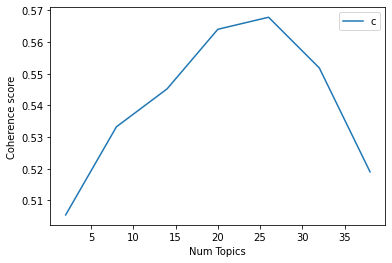

In [69]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [ ]:
# Select the model and print the topics
#optimal_model = model_list[1]
optimal_model =  models.LdaModel.load('optimal_model.model')
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))